In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [8]:
import gymnasium as gym

env = gym.make("LunarLander-v2",render_mode='human')

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class DQN(nn.Module):
  def __init__(self, n_observations, n_actions):
    super(DQN, self).__init__()
    self.layer0 = nn.Linear(n_observations, 128)
    self.dropout0 = nn.Dropout(0.2)
    self.layer1 = nn.Linear(128, 128)
    self.dropout1 = nn.Dropout(0.2)
    self.layer2 = nn.Linear(128, 128)
    self.dropout2 = nn.Dropout(0.2)
    self.layer3 = nn.Linear(128, n_actions)

  def forward(self, x):
    x = F.relu(self.layer0(x))
    x = self.dropout0(x)
    x = F.relu(self.layer1(x))
    x = self.dropout1(x)
    x = F.relu(self.layer2(x))
    x = self.dropout2(x)
    return self.layer3(x) 

In [4]:
_MODEL_DATE_NAME = '20230404012253'

state, info = env.reset()
n_observations = len(state)
n_actions = env.action_space.n

model = DQN(n_observations, n_actions).to(device)
load_dict = torch.load(f'./saved_models/{_MODEL_DATE_NAME}/policy_net')
model.load_state_dict(load_dict)

<All keys matched successfully>

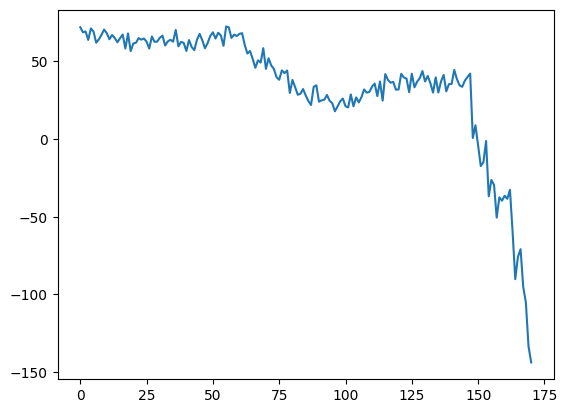

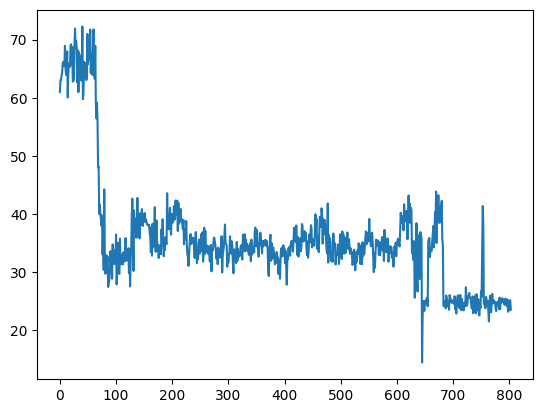

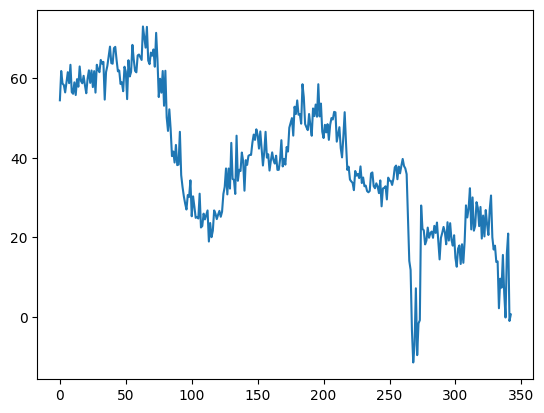

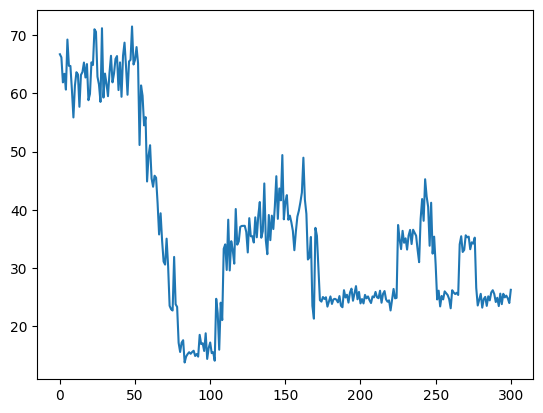

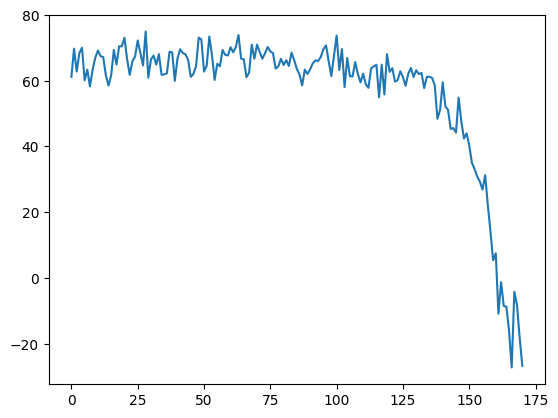

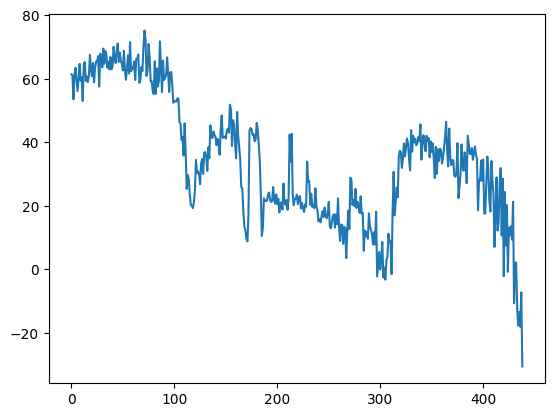

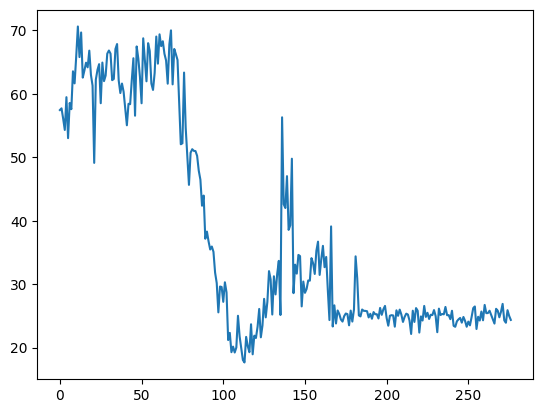

KeyboardInterrupt: 

In [10]:
from itertools import count
from matplotlib import pyplot as plt



while True:
    x=[]
    y=[]
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

    for t in count():
        with torch.no_grad():
            action = model(state).max(1)[1].view(1,1)
            qvalue = model(state).max(1)[0].item()

        observation, reward, terminated, truncated, _ = env.step(action.item())
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)


        x.append(t)
        y.append(qvalue)
        state = next_state
        env.render()
        
        if done:
            plt.plot(x,y)
            plt.show()
            break
    